In [1]:
import pandas as pd

In [7]:
dados_vendas = pd.read_json('/content/dados_vendas_clientes.json')
dados_vendas

,dados_vendas
0,"{'Data de venda': '06/06/2022', 'Cliente': ['@..."
1,"{'Data de venda': '07/06/2022', 'Cliente': ['I..."
2,"{'Data de venda': '08/06/2022', 'Cliente': ['I..."
3,"{'Data de venda': '09/06/2022', 'Cliente': ['J..."
4,"{'Data de venda': '10/06/2022', 'Cliente': ['M..."


In [8]:
dados_vendas = pd.json_normalize(dados_vendas['dados_vendas'])
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


In [10]:
colunas_vendas = list(dados_vendas.columns)
colunas_vendas

['Data de venda', 'Cliente', 'Valor da compra']

In [ ]:
dados_vendas.explode(colunas_vendas[1:])

In [13]:
dados_vendas = dados_vendas.explode(colunas_vendas[1:])
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
1,07/06/2022,Isabely JOanes 738,"R$ 825,31"
1,07/06/2022,Isabely JOanes 738,"R$ 168,07"
1,07/06/2022,Isabely JOanes 738,"R$ 339,18"
1,07/06/2022,Isabely JOanes 738,"R$ 314,69"
2,08/06/2022,Isabely JOanes 738,"R$ 682,05"
2,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [14]:
dados_vendas.reset_index(inplace = True, drop = True)
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
1,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
2,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
3,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
4,07/06/2022,Isabely JOanes 738,"R$ 825,31"
5,07/06/2022,Isabely JOanes 738,"R$ 168,07"
6,07/06/2022,Isabely JOanes 738,"R$ 339,18"
7,07/06/2022,Isabely JOanes 738,"R$ 314,69"
8,08/06/2022,Isabely JOanes 738,"R$ 682,05"
9,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [15]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data de venda    20 non-null     object
 1   Cliente          20 non-null     object
 2   Valor da compra  20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [16]:
import numpy as np

In [22]:
#removendo o cifrão e os espaços em branco e ajustando a pontuação da virgula para que o pandas consiga converter depois
dados_vendas['Valor da compra'].apply(lambda x: x.replace('R$', '').replace(',', '.').strip())

0      836.5
1     573.33
2      392.8
3     512.34
4     825.31
5     168.07
6     339.18
7     314.69
8     682.05
9     386.34
10    622.65
11    630.79
12     390.3
13    759.16
14    334.47
15    678.78
16    314.24
17    311.15
18    899.16
19    885.24
Name: Valor da compra, dtype: object

In [23]:
dados_vendas['Valor da compra'] = dados_vendas['Valor da compra'].apply(lambda x: x.replace('R$', '').replace(',', '.').strip())
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,836.5
1,06/06/2022,DieGO ARMANDIU 210,573.33
2,06/06/2022,DieGO ARMANDIU 210,392.8
3,06/06/2022,DieGO ARMANDIU 210,512.34
4,07/06/2022,Isabely JOanes 738,825.31
5,07/06/2022,Isabely JOanes 738,168.07
6,07/06/2022,Isabely JOanes 738,339.18
7,07/06/2022,Isabely JOanes 738,314.69
8,08/06/2022,Isabely JOanes 738,682.05
9,08/06/2022,JOãO Gabriel 671,386.34


In [26]:
dados_vendas['Valor da compra'] = dados_vendas['Valor da compra'].astype(np.float32)
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,836.500000
1,06/06/2022,DieGO ARMANDIU 210,573.330017
2,06/06/2022,DieGO ARMANDIU 210,392.799988
3,06/06/2022,DieGO ARMANDIU 210,512.340027
4,07/06/2022,Isabely JOanes 738,825.309998
5,07/06/2022,Isabely JOanes 738,168.070007
6,07/06/2022,Isabely JOanes 738,339.179993
7,07/06/2022,Isabely JOanes 738,314.690002
8,08/06/2022,Isabely JOanes 738,682.049988
9,08/06/2022,JOãO Gabriel 671,386.339996


In [32]:
#arredondando o número float para duas casas decimais
dados_vendas['Valor da compra'] = dados_vendas['Valor da compra'].apply(lambda x: round(x , 2))
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,836.50
1,06/06/2022,DieGO ARMANDIU 210,573.33
2,06/06/2022,DieGO ARMANDIU 210,392.80
3,06/06/2022,DieGO ARMANDIU 210,512.34
4,07/06/2022,Isabely JOanes 738,825.31
5,07/06/2022,Isabely JOanes 738,168.07
6,07/06/2022,Isabely JOanes 738,339.18
7,07/06/2022,Isabely JOanes 738,314.69
8,08/06/2022,Isabely JOanes 738,682.05
9,08/06/2022,JOãO Gabriel 671,386.34


In [38]:
dados_vendas['Cliente'] = dados_vendas['Cliente'].str.title()
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@Ana _Lucia 321,836.50
1,06/06/2022,Diego Armandiu 210,573.33
2,06/06/2022,Diego Armandiu 210,392.80
3,06/06/2022,Diego Armandiu 210,512.34
4,07/06/2022,Isabely Joanes 738,825.31
5,07/06/2022,Isabely Joanes 738,168.07
6,07/06/2022,Isabely Joanes 738,339.18
7,07/06/2022,Isabely Joanes 738,314.69
8,08/06/2022,Isabely Joanes 738,682.05
9,08/06/2022,João Gabriel 671,386.34


In [40]:
dados_vendas['Cliente'].str.replace('[^a-zA-Z\ã\-\']', ' ', regex=True)

0         Ana  Lucia    
1     Diego Armandiu    
2     Diego Armandiu    
3     Diego Armandiu    
4     Isabely Joanes    
5     Isabely Joanes    
6     Isabely Joanes    
7     Isabely Joanes    
8     Isabely Joanes    
9       João Gabriel    
10    Julya Meireles    
11    Julya Meireles    
12    Julya Meireles    
13       Maria Julia    
14       Maria Julia    
15       Maria Julia    
16       Maria Julia    
17       Pedro Pasco    
18      Paulo Castro    
19     Thiago Fritzz    
Name: Cliente, dtype: object

In [41]:
dados_vendas['Cliente'] = dados_vendas['Cliente'].str.replace('[^a-zA-Z\ã\-\']', ' ', regex=True)
dados_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,Ana Lucia,836.50
1,06/06/2022,Diego Armandiu,573.33
2,06/06/2022,Diego Armandiu,392.80
3,06/06/2022,Diego Armandiu,512.34
4,07/06/2022,Isabely Joanes,825.31
5,07/06/2022,Isabely Joanes,168.07
6,07/06/2022,Isabely Joanes,339.18
7,07/06/2022,Isabely Joanes,314.69
8,08/06/2022,Isabely Joanes,682.05
9,08/06/2022,João Gabriel,386.34


In [49]:
dados_vendas.to_csv('dados_vendas_formatado.csv', index= False)

In [50]:
dados_vendas_novo = pd.read_csv('/content/dados_vendas_formatado.csv')
dados_vendas_novo

,Data de venda,Cliente,Valor da compra
0,06/06/2022,Ana Lucia,836.50
1,06/06/2022,Diego Armandiu,573.33
2,06/06/2022,Diego Armandiu,392.80
3,06/06/2022,Diego Armandiu,512.34
4,07/06/2022,Isabely Joanes,825.31
5,07/06/2022,Isabely Joanes,168.07
6,07/06/2022,Isabely Joanes,339.18
7,07/06/2022,Isabely Joanes,314.69
8,08/06/2022,Isabely Joanes,682.05
9,08/06/2022,João Gabriel,386.34


In [52]:
dados_vendas_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data de venda    20 non-null     object 
 1   Cliente          20 non-null     object 
 2   Valor da compra  20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


In [54]:
pd.to_datetime(dados_vendas_novo['Data de venda'], format="%d/%m/%Y")

0    2022-06-06
1    2022-06-06
2    2022-06-06
3    2022-06-06
4    2022-06-07
5    2022-06-07
6    2022-06-07
7    2022-06-07
8    2022-06-08
9    2022-06-08
10   2022-06-08
11   2022-06-08
12   2022-06-09
13   2022-06-09
14   2022-06-09
15   2022-06-09
16   2022-06-10
17   2022-06-10
18   2022-06-10
19   2022-06-10
Name: Data de venda, dtype: datetime64[ns]

In [55]:
dados_vendas_novo['Data de venda'] = pd.to_datetime(dados_vendas_novo['Data de venda'], format="%d/%m/%Y")
dados_vendas_novo

,Data de venda,Cliente,Valor da compra
0,2022-06-06,Ana Lucia,836.50
1,2022-06-06,Diego Armandiu,573.33
2,2022-06-06,Diego Armandiu,392.80
3,2022-06-06,Diego Armandiu,512.34
4,2022-06-07,Isabely Joanes,825.31
5,2022-06-07,Isabely Joanes,168.07
6,2022-06-07,Isabely Joanes,339.18
7,2022-06-07,Isabely Joanes,314.69
8,2022-06-08,Isabely Joanes,682.05
9,2022-06-08,João Gabriel,386.34


In [3]:
dados_imoveis = pd.read_json('/content/dados_locacao_imoveis.json')
dados_imoveis

,dados_locacao
0,"{'apartamento': 'A101 (blocoAP)', 'datas_combi..."
1,"{'apartamento': 'A102 (blocoAP)', 'datas_combi..."
2,"{'apartamento': 'B201 (blocoAP)', 'datas_combi..."
3,"{'apartamento': 'B202 (blocoAP)', 'datas_combi..."
4,"{'apartamento': 'C301 (blocoAP)', 'datas_combi..."
5,"{'apartamento': 'C302 (blocoAP)', 'datas_combi..."
6,"{'apartamento': 'D401 (blocoAP)', 'datas_combi..."
7,"{'apartamento': 'D402 (blocoAP)', 'datas_combi..."
8,"{'apartamento': 'E501 (blocoAP)', 'datas_combi..."
9,"{'apartamento': 'E502 (blocoAP)', 'datas_combi..."


In [ ]:
dados_imoveis = pd.json_normalize(dados_imoveis['dados_locacao'])
dados_imoveis

In [56]:
dados_imoveis

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),"[01/06/2022, 01/07/2022]","[05/06/2022, 03/07/2022]","[$ 1000,0 reais, $ 2500,0 reais]"
1,A102 (blocoAP),"[02/06/2022, 02/07/2022]","[02/06/2022, 06/07/2022]","[$ 1100,0 reais, $ 2600,0 reais]"
2,B201 (blocoAP),"[03/06/2022, 03/07/2022]","[07/06/2022, 03/07/2022]","[$ 1200,0 reais, $ 2700,0 reais]"
3,B202 (blocoAP),"[04/06/2022, 04/07/2022]","[07/06/2022, 05/07/2022]","[$ 1300,0 reais, $ 2800,0 reais]"
4,C301 (blocoAP),"[05/06/2022, 05/07/2022]","[10/06/2022, 09/07/2022]","[$ 1400,0 reais, $ 2900,0 reais]"
5,C302 (blocoAP),"[06/06/2022, 06/07/2022]","[08/06/2022, 12/07/2022]","[$ 1500,0 reais, $ 1200,0 reais]"
6,D401 (blocoAP),"[07/06/2022, 07/07/2022]","[07/06/2022, 09/07/2022]","[$ 1600,0 reais, $ 1300,0 reais]"
7,D402 (blocoAP),"[08/06/2022, 08/07/2022]","[10/06/2022, 14/07/2022]","[$ 1700,0 reais, $ 1400,0 reais]"
8,E501 (blocoAP),"[09/06/2022, 09/07/2022]","[10/06/2022, 09/07/2022]","[$ 1800,0 reais, $ 1500,0 reais]"
9,E502 (blocoAP),"[10/06/2022, 10/07/2022]","[16/06/2022, 12/07/2022]","[$ 1900,0 reais, $ 1600,0 reais]"


In [57]:
colunas_dados_imoveis = list(dados_imoveis.columns)
colunas_dados_imoveis

['apartamento',
 'datas_combinadas_pagamento',
 'datas_de_pagamento',
 'valor_aluguel']

In [58]:
dados_imoveis.explode(colunas_dados_imoveis[1:])

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
0,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
1,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
1,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
2,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
2,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
3,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
3,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
4,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
4,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [59]:
dados_imoveis = dados_imoveis.explode(colunas_dados_imoveis[1:])
dados_imoveis

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
0,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
1,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
1,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
2,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
2,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
3,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
3,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
4,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
4,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [60]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   apartamento                 30 non-null     object
 1   datas_combinadas_pagamento  30 non-null     object
 2   datas_de_pagamento          30 non-null     object
 3   valor_aluguel               30 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


In [61]:
dados_imoveis.reset_index(inplace = True, drop = True)
dados_imoveis

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
1,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
2,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
3,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
4,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
5,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
6,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
7,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
8,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
9,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [65]:
dados_imoveis['valor_aluguel'] = dados_imoveis['valor_aluguel'].apply(lambda x: x.replace('$', '').replace(',', '.').strip())

In [69]:
dados_imoveis['valor_aluguel'].str.replace('[a-zA-Z\']', '', regex=True)

0     1000.0 
1     2500.0 
2     1100.0 
3     2600.0 
4     1200.0 
5     2700.0 
6     1300.0 
7     2800.0 
8     1400.0 
9     2900.0 
10    1500.0 
11    1200.0 
12    1600.0 
13    1300.0 
14    1700.0 
15    1400.0 
16    1800.0 
17    1500.0 
18    1900.0 
19    1600.0 
20    2000.0 
21    1000.0 
22    2100.0 
23    1100.0 
24    2200.0 
25    1200.0 
26    2300.0 
27    2100.0 
28    2400.0 
29    2200.0 
Name: valor_aluguel, dtype: object

In [71]:
dados_imoveis['valor_aluguel'] = dados_imoveis['valor_aluguel'].str.replace('[a-zA-Z\']', '', regex=True)

In [74]:
dados_imoveis['valor_aluguel'] = dados_imoveis['valor_aluguel'].astype(np.float64)

In [76]:
# Opção de substituição - necessário verificar o resultado da substituição
# Foi necessário adicionar a barra '\' para ser considerados os parênteses como caracteres literais
dados_imoveis['apartamento'].str.replace(' \(blocoAP\)', '')

<ipython-input-76-82a0a0027b3a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dados_imoveis['apartamento'].str.replace(' \(blocoAP\)', '')


0     A101
1     A101
2     A102
3     A102
4     B201
5     B201
6     B202
7     B202
8     C301
9     C301
10    C302
11    C302
12    D401
13    D401
14    D402
15    D402
16    E501
17    E501
18    E502
19    E502
20    F601
21    F601
22    F602
23    F602
24    G701
25    G701
26    G702
27    G702
28    H801
29    H801
Name: apartamento, dtype: object

In [78]:
# Realizar a substituição dos dados na coluna textual
dados_imoveis['apartamento'] = dados_imoveis['apartamento'].str.replace(' \(blocoAP\)', '')
# Visualizar o resultado final
dados_imoveis

<ipython-input-78-3b055985bfe8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dados_imoveis['apartamento'] = dados_imoveis['apartamento'].str.replace(' \(blocoAP\)', '')


,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101,01/06/2022,05/06/2022,1000.0
1,A101,01/07/2022,03/07/2022,2500.0
2,A102,02/06/2022,02/06/2022,1100.0
3,A102,02/07/2022,06/07/2022,2600.0
4,B201,03/06/2022,07/06/2022,1200.0
5,B201,03/07/2022,03/07/2022,2700.0
6,B202,04/06/2022,07/06/2022,1300.0
7,B202,04/07/2022,05/07/2022,2800.0
8,C301,05/06/2022,10/06/2022,1400.0
9,C301,05/07/2022,09/07/2022,2900.0


In [80]:
dados_imoveis['datas_combinadas_pagamento'] = pd.to_datetime(dados_imoveis['datas_combinadas_pagamento'], format="%d/%m/%Y")
dados_imoveis['datas_de_pagamento'] = pd.to_datetime(dados_imoveis['datas_de_pagamento'], format="%d/%m/%Y")
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   apartamento                 30 non-null     object        
 1   datas_combinadas_pagamento  30 non-null     datetime64[ns]
 2   datas_de_pagamento          30 non-null     datetime64[ns]
 3   valor_aluguel               30 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.1+ KB


In [81]:
preco_pgto_por_data = dados_imoveis.groupby(dados_imoveis['datas_de_pagamento'])['valor_aluguel'].sum()
preco_pgto_por_data

datas_de_pagamento
2022-06-02    1100.0
2022-06-05    1000.0
2022-06-07    4100.0
2022-06-08    1500.0
2022-06-10    4900.0
2022-06-15    4400.0
2022-06-16    1900.0
2022-06-17    2000.0
2022-06-18    2400.0
2022-06-19    2200.0
2022-07-03    5200.0
2022-07-05    2800.0
2022-07-06    2600.0
2022-07-09    5700.0
2022-07-12    3900.0
2022-07-13    1000.0
2022-07-14    1400.0
2022-07-16    2200.0
2022-07-17    2100.0
2022-07-20    1200.0
Name: valor_aluguel, dtype: float64

# Cliente com mais compras na semana

In [82]:
dados_vendas_novo

,Data de venda,Cliente,Valor da compra
0,2022-06-06,Ana Lucia,836.50
1,2022-06-06,Diego Armandiu,573.33
2,2022-06-06,Diego Armandiu,392.80
3,2022-06-06,Diego Armandiu,512.34
4,2022-06-07,Isabely Joanes,825.31
5,2022-06-07,Isabely Joanes,168.07
6,2022-06-07,Isabely Joanes,339.18
7,2022-06-07,Isabely Joanes,314.69
8,2022-06-08,Isabely Joanes,682.05
9,2022-06-08,João Gabriel,386.34


In [83]:
compras_clientes = dados_vendas_novo.groupby(dados_vendas_novo['Cliente'])['Valor da compra'].sum()
compras_clientes

Cliente
 Ana  Lucia            836.50
Diego Armandiu        1478.47
Isabely Joanes        2329.30
João Gabriel           386.34
Julya Meireles        1643.74
Maria Julia           2086.65
Paulo Castro           899.16
Pedro Pasco            311.15
Thiago Fritzz          885.24
Name: Valor da compra, dtype: float64

In [88]:
compras_clientes.sort_values(ascending = False)

Cliente
Isabely Joanes        2329.30
Maria Julia           2086.65
Julya Meireles        1643.74
Diego Armandiu        1478.47
Paulo Castro           899.16
Thiago Fritzz          885.24
 Ana  Lucia            836.50
João Gabriel           386.34
Pedro Pasco            311.15
Name: Valor da compra, dtype: float64

In [84]:
from matplotlib import pyplot as plt

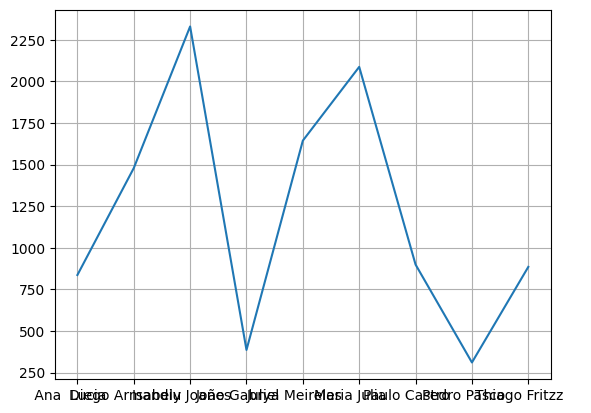

<Figure size 4000x3000 with 0 Axes>

In [94]:
plt.plot(compras_clientes)
plt.grid(True)
plt.figure(figsize=(40,30))
plt.show()

# Conferindo clientes inadimplentes com o pagamento dos apartamentos

In [95]:
dados_imoveis['atraso'] = (dados_imoveis['datas_de_pagamento'] - dados_imoveis['datas_combinadas_pagamento']).dt.days
dados_imoveis

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,atraso
0,A101,2022-06-01,2022-06-05,1000.0,4
1,A101,2022-07-01,2022-07-03,2500.0,2
2,A102,2022-06-02,2022-06-02,1100.0,0
3,A102,2022-07-02,2022-07-06,2600.0,4
4,B201,2022-06-03,2022-06-07,1200.0,4
5,B201,2022-07-03,2022-07-03,2700.0,0
6,B202,2022-06-04,2022-06-07,1300.0,3
7,B202,2022-07-04,2022-07-05,2800.0,1
8,C301,2022-06-05,2022-06-10,1400.0,5
9,C301,2022-07-05,2022-07-09,2900.0,4


In [105]:
def determinar_adimplencia(atraso):
    if atraso > 0:
        return "Atrasou"
    else:
        return "Pagou em dia"

dados_imoveis['adimplente'] = dados_imoveis['atraso'].apply(determinar_adimplencia)

dados_imoveis

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel,atraso,adimplente
0,A101,2022-06-01,2022-06-05,1000.0,4,Atrasou
1,A101,2022-07-01,2022-07-03,2500.0,2,Atrasou
2,A102,2022-06-02,2022-06-02,1100.0,0,Pagou em dia
3,A102,2022-07-02,2022-07-06,2600.0,4,Atrasou
4,B201,2022-06-03,2022-06-07,1200.0,4,Atrasou
5,B201,2022-07-03,2022-07-03,2700.0,0,Pagou em dia
6,B202,2022-06-04,2022-06-07,1300.0,3,Atrasou
7,B202,2022-07-04,2022-07-05,2800.0,1,Atrasou
8,C301,2022-06-05,2022-06-10,1400.0,5,Atrasou
9,C301,2022-07-05,2022-07-09,2900.0,4,Atrasou


In [103]:
dados_imoveis['atraso'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: atraso
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 368.0 bytes


In [106]:
dados_imoveis.to_csv('dados_imoveis_formatado.csv')